In [401]:
# Import fundamental libraries
# import sys
import os

# Import datasci libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from PIL import Image
import datetime as dt

# Configure fonts
FONT_PATH = "/workspaces/Enterprise/00_Pinksheepkit/fonts/poppins/Poppins-{0}.ttf"
FONT_PATH = "c://Users//Art//Documents//A1-AspirePC//CS Project//07_Enterprise//Enterprise//00_Pinksheepkit//fonts//poppins//Poppins-{0}.ttf"
HEADING = "Bold"
LABEL = "Regular"
CONTENT = "Light"

H_FONT = {"fontproperties": fm.FontProperties(fname=FONT_PATH.format(HEADING)), "size": 12}
L_FONT = {"fontproperties": fm.FontProperties(fname=FONT_PATH.format(LABEL)), "size": 10}
C_FONT = {"fontproperties": fm.FontProperties(fname=FONT_PATH.format(CONTENT)), "size": 8}

# Configure plt rc params
plt.rcParams['figure.dpi'] = 100

# Configure system path
# sys.path = [
#     '/workspaces/Enterprise/02_Candlestick', # Working dir
#     '/home/codespace/.python/current/lib/python310.zip',
#     '/home/codespace/.python/current/lib/python3.10',
#     '/home/codespace/.python/current/lib/python3.10/lib-dynload',
#     '/home/codespace/.local/lib/python3.10/site-packages',
#     '/home/codespace/.python/current/lib/python3.10/site-packages']


In [378]:
# Get file path
PATH_INPUT = "c://Users//Art//Documents//A1-AspirePC//CS Project//07_Enterprise//Enterprise//02_Candlestick//input//"
# PATH_INPUT = "/workspaces/Enterprise/02_Candlestick/input/"
FILE_INPUT = next(os.walk(PATH_INPUT), (None, None, []))[2]

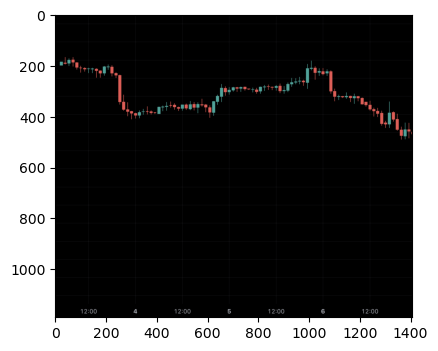

In [380]:
# load the image and convert into list
IMG = Image.open(PATH_INPUT + FILE_INPUT[0])
IMG_LIST = np.asarray(IMG).tolist()

# Loop over pixels and collect frequency of each color pixel
COLOR_FREQ = {(0, 0, 0): 0}
for h in np.arange(len(IMG_LIST)):
    for w in np.arange(len(IMG_LIST[h])):
        r, g, b = IMG_LIST[h][w]
        if (r, g, b) in COLOR_FREQ:
            COLOR_FREQ[(r, g, b)] += 1
        else:
            COLOR_FREQ[(r, g, b)] = 1

# Sort COLOR_FREQ keys by values
COLOR_FREQ = ({k: v for k, v in sorted(COLOR_FREQ.items(), key=lambda item: item[1])})

# Check processed image
plt.imshow(IMG_LIST)


In [381]:
# Plot color composition
def color_composition(color_freq):
    """Scatter plot of all pixel R/G color composition"""

    # Prepare varibles for R-G plot
    var_label = list(color_freq.keys())
    var_freq = list(color_freq.values())
    var_r = [r for r, g, b in var_label]
    var_g = [g for r, g, b in var_label]
    var_colors = [((r / 255), (g / 255), (b / 255)) for r, g, b in var_label]
    var_size = [100 * s/(100 + s) for s in var_freq]
    
    # Prepare varibles for (R+G)-(R/G) plot
    var_plus = [r + g for r, g, b in var_label]
    var_diff = [r - g for r, g, b in var_label]

    # Plot bar charts
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(var_r, var_g, c=var_colors, s=var_size)
    ax[1].scatter(var_diff, var_plus, c=var_colors, s=var_size)
    
    # # Format charts
    plt.xticks(**C_FONT)
    plt.yticks(**C_FONT)
    ax[0].set_title("Image color composition R/G", **H_FONT)
    ax[0].set_xlabel("Red HEX", **L_FONT)
    ax[0].set_ylabel("Green HEX", **L_FONT)
    ax[0].grid(True)
    ax[1].set_title("Image color composition RG-Brightness", **H_FONT)
    ax[1].set_xlabel("R - G", **L_FONT)
    ax[1].set_ylabel("R + G", **L_FONT)
    ax[1].grid(True)

    print(color_freq)
    return(fig, ax)


{(78, 161, 151): 1, (83, 162, 156): 1, (3, 0, 0): 1, (16, 14, 17): 1, (218, 94, 84): 1, (80, 162, 148): 1, (40, 39, 44): 1, (9, 9, 11): 1, (26, 24, 27): 1, (3, 1, 2): 1, (162, 165, 170): 1, (141, 144, 151): 1, (176, 176, 186): 1, (117, 116, 122): 1, (93, 94, 96): 1, (161, 164, 169): 1, (111, 111, 111): 1, (27, 28, 30): 1, (55, 54, 59): 1, (144, 143, 149): 1, (55, 55, 55): 1, (139, 142, 147): 1, (178, 178, 188): 1, (31, 32, 34): 1, (8, 6, 7): 1, (113, 114, 116): 1, (109, 110, 114): 1, (57, 58, 62): 1, (173, 176, 183): 1, (56, 60, 63): 1, (134, 137, 142): 1, (51, 53, 52): 1, (60, 61, 63): 1, (20, 19, 24): 1, (147, 147, 155): 1, (19, 18, 23): 1, (9, 11, 10): 1, (23, 24, 28): 1, (173, 173, 183): 1, (165, 168, 177): 1, (135, 138, 145): 1, (117, 116, 121): 1, (131, 132, 137): 1, (23, 24, 26): 1, (45, 46, 50): 1, (28, 30, 29): 1, (119, 120, 125): 1, (28, 29, 31): 1, (24, 25, 27): 1, (21, 22, 24): 1, (71, 75, 78): 1, (120, 119, 125): 1, (23, 21, 24): 1, (160, 163, 168): 1, (78, 77, 82): 1, (59

(<Figure size 1000x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Image color composition R/G'}, xlabel='Red HEX', ylabel='Green HEX'>,
        <AxesSubplot:title={'center':'Image color composition RG-Brightness'}, xlabel='R - G', ylabel='R + G'>],
       dtype=object))

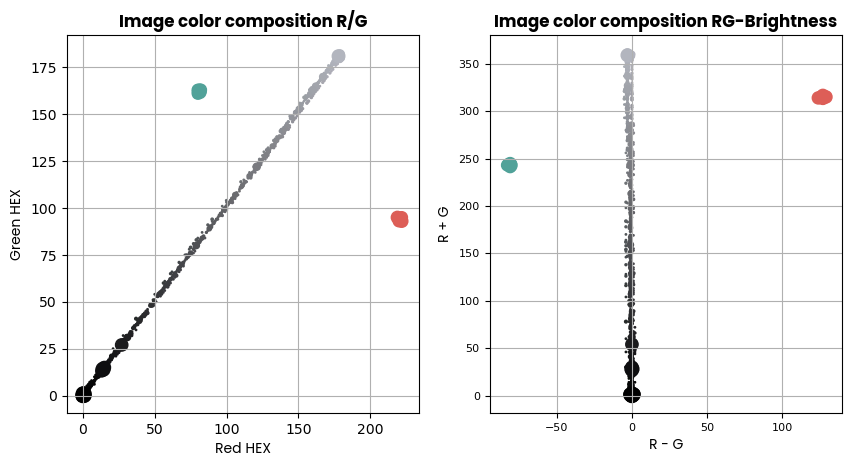

In [382]:
# Analyze color composition
color_composition(COLOR_FREQ)

# Bullish candle -> (70-120, 150-170, 140-160) -> (81, 162, 153)
# Bearish candle -> (180-230, 80-100, 80-100) -> (221, 94, 87)

In [396]:
# Highlight bull and bear candles
# Bull -> R - G < -10 & R + G > 200
# Bear -> R + G > 10 & R + G > 200
# Loop over pixels
CANDLESTICK_POLYMERASE = {} # {w: [count, lowest_point]}
for h in np.arange(len(IMG_LIST)):
    for w in np.arange(len(IMG_LIST[h])):
        r, g, b = IMG_LIST[h][w]
        if (r + g > 200) & (r - g < -10):
            if w in CANDLESTICK_POLYMERASE:
                CANDLESTICK_POLYMERASE[w][0] += 1
                CANDLESTICK_POLYMERASE[w][1] = len(IMG_LIST[h]) - h - 1
            else:
                CANDLESTICK_POLYMERASE[w] = [1, len(IMG_LIST[h]) - h - 1]
        elif (r + g > 200) & (r - g > 10):
            if w in CANDLESTICK_POLYMERASE:
                CANDLESTICK_POLYMERASE[w][0] -= 1
                CANDLESTICK_POLYMERASE[w][1] = len(IMG_LIST[h]) - h - 1
            else:
                CANDLESTICK_POLYMERASE[w] = [-1, len(IMG_LIST[h]) - h - 1]

# Sort CANDLESTICK_POLYMERASE keys
CANDLESTICK_POLYMERASE = ({k: v for k, v in sorted(
    CANDLESTICK_POLYMERASE.items(), key=lambda item: item[0])})


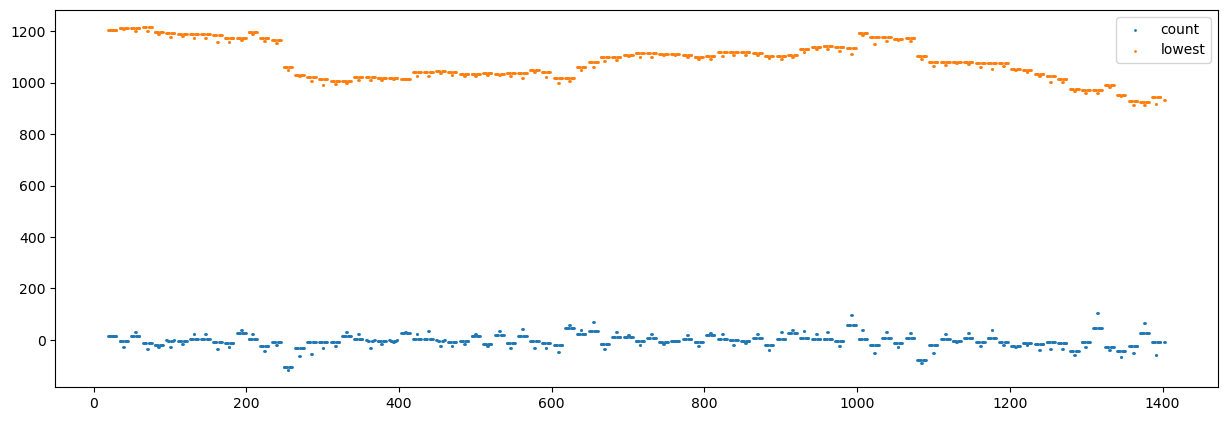

In [399]:
# Visualize candlestick reading
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(list(CANDLESTICK_POLYMERASE.keys()), list(i[0] for i in CANDLESTICK_POLYMERASE.values()), s=1, label="count")
ax.scatter(list(CANDLESTICK_POLYMERASE.keys()), list(
    i[1] for i in CANDLESTICK_POLYMERASE.values()), s=1, label="lowest")

ax.legend()


In [403]:
# Generate candlestick value
CANDLESTICK = {} # {date: [open, high, low, close]}
count = 0
# datetime(year, month, day, hour, minute, second)
initial_time = dt.datetime(2022, 12, 28, 00, 00, 00)
delta_time = dt.timedelta(hours=1)

# XAU market close -> SAT 05.00 - MON 04.00

candle_time = initial_time
for w in CANDLESTICK_POLYMERASE.keys():
    CANDLESTICK[candle_time] = 1


2